In [47]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import array as arr
import numpy as np
import math
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")
import matplotlib.colors as colors
import matplotlib.cm as cmx

# Read in the Data

In [48]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [49]:
# we only use 2 iris species for this example so we drop last 50 rows of the dataset
df = df[df.target != 2]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [50]:
# we only consider two features at a time for this project, and only two species
# and add a bias column for the algorithm
data = df.drop(
    ["petal length (cm)", "petal width (cm)"], axis = 1).rename(
    columns = {"sepal length (cm)":"length", "sepal width (cm)":"width"})
data.head()

,length,width,target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [51]:
# add a column of ones for bias
data["bias"] = 1
data.head()
print(data.shape)
data.head()

(100, 4)


,length,width,target,bias
0,5.1,3.5,0.0,1
1,4.9,3.0,0.0,1
2,4.7,3.2,0.0,1
3,4.6,3.1,0.0,1
4,5.0,3.6,0.0,1


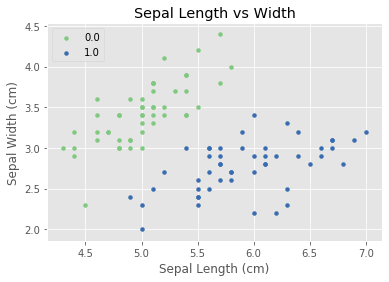

In [63]:
# a look at the data, we see that it is clearly linearly separable
# 0.0 = setosa, 1.0 = versicolor

sl=data['length']
sw=data['width']
uniq = list(set(data['target']))

# Set the color map to match the number of species
z = range(1,len(uniq))
Accent = plt.get_cmap('Accent')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=Accent)

# Plot each species
for i in range(len(uniq)):
    indx = data['target'] == uniq[i]
    plt.scatter(sl[indx], sw[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

# plt.scatter(data["length"], data["width"], c = data["target"], label = data["target"])
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Width")
plt.legend(loc = "upper left")
plt.show()

# Create Functions

In [65]:
# makes our data logistic function friendly
def sigmoid(z): 
    return 1/(1 + np.exp(-z))

In [64]:
def logloss(data, target, w):
    loss = np.dot(data, w)
    ll = np.sum(data*loss - np.log(1+ np.exp(loss)))
    return ll

In [124]:
def logistic_regression(data, target, epochs, lrate):
    w = np.zeros(data.shape[1])
    for i in range(epochs):
        loss = np.dot(data, w)
        predictions = sigmoid(loss)
        error = target - predictions
        gradient = np.dot(data.T, error)
        # weight update rule
        w += lrate*gradient
#         print(logloss(data, target, w))
    return w

# Run the Algorithm

In [ ]:
# prepping data
Y = data[["target"]].values
target = []
for i in Y:
    for j in i:
        target.append(j)
target = np.asarray(target)

In [125]:
logistic_regression(data[["length", "width", "bias"]].values, target, 100, .1)

array([  63.02275065, -108.23347363,  -11.126085  ])

In [107]:
data[["length", "width", "bias"]].values[0]

array([5.1, 3.5, 1. ])

In [114]:
w = logistic_regression(data[["length", "width", "bias"]].values, target, 100, .1)
w

array([  63.02275065, -108.23347363,  -11.126085  ])

In [120]:
alltrain = np.dot(data[["length", "width", "bias"]].values, w)
preds = np.round(sigmoid(alltrain))

In [121]:
preds

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [119]:
((preds == target).sum().astype(float) / len(preds))

0.98